# 분류와 군집화
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### k-NN 알고리즘에 사용할 견종의 표본 집합 시각화

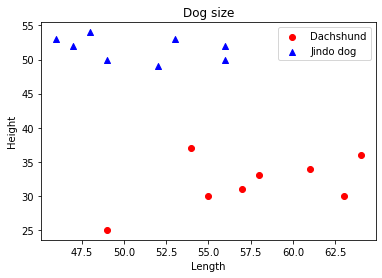

In [3]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

### k-NN 분류기를 실행하자 

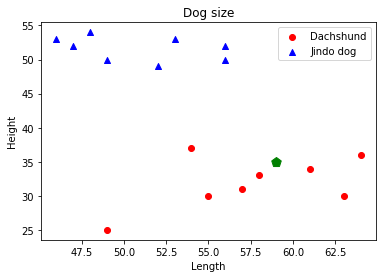

In [4]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',\
            c='g', label='new Data');

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자

# 모델만드는파트
knn = KNeighborsClassifier(n_neighbors = k) 

#학습시키는파트
knn.fit(dogs, labels)

#예측하는파트
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥스훈트


#### 참고 코드 : kNN에서 이웃한 데이터를 얻는 코드

dist = [[2.23606798 2.23606798 4.47213595]] indexes = [[4 7 1]] dogs[indexes]= [[[58 33]
  [61 34]
  [57 31]]]
data = (16, 2)
index = (1, 3)
k = 3
데이터 [[59, 35]] , 판정 결과: 닥스훈트


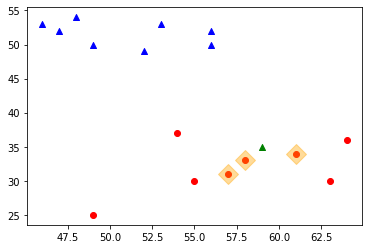

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)

distances, indexes = knn.kneighbors(newdata)
#plt.scatter(train_input[indexes], train_target[indexes], marker='D')
print('dist =', distances, 'indexes =', indexes, 'dogs[indexes]=', dogs[indexes])

#이웃한 점을 표시해주는 함수
def draw_neightbor(data, index, k):
    print('data =', data.shape)
    print('index =', index.shape)
    print('k =', k)
    for i in range(k):
        plt.scatter(data[index][0][i][0], dogs[index][0][i][1], marker='D', color='orange', s=200, alpha=0.4)

plt.scatter(59, 35, color = 'green', marker='^')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

draw_neightbor(dogs, indexes, k)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

In [7]:
distances.shape

(1, 3)

In [8]:
indexes.shape

(1, 3)

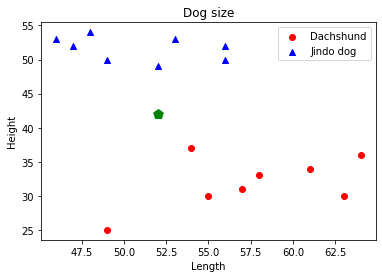

In [9]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [52]    # 새로운 데이터의 길이
newdata_height = [42]    # 새로운 데이터의 높이

newdata = [[52, 42]]

# ...코드 생략
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')

In [10]:
newdata = [[52, 42]]

k = 1     # k를 1으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

#k를 1로 두니까 닥스훈트...

데이터 [[52, 42]] , 판정 결과: 닥스훈트


데이터 [[52, 42]] , 판정 결과: 진돗개
distances [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]] , indexes: [[ 6 14 12 10  8]]
data = (16, 2)
index = (1, 5)
k = 5


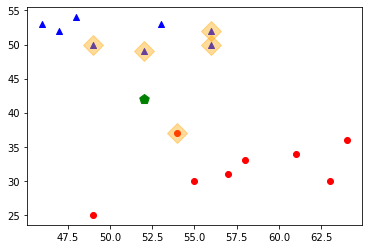

In [11]:
newdata = [[52, 42]]

k = 5     # k를 5으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

distances, indexes = knn.kneighbors(newdata)
print('distances', distances, ', indexes:', indexes)
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')
draw_neightbor(dogs, indexes, k)
# 가까운곳 5개를 잡으니까 진돗개.....

In [12]:
k = 9     # k를 9로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[52, 42]] , 판정 결과: 진돗개


### k-NN 활용 예제 - 붓꽃 데이터 준비하기

In [13]:
from sklearn.datasets import load_iris 

iris = load_iris() 
iris.data[:3]     # 최초 3개 데이터의 값을 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [14]:
print('iris 데이터의 형태:', iris.data.shape)
# 150개의 붓꽃, 4개의 붓꽃의 길이(꽃 길이, 넓이, 꽃받침의 길이, 넓이)

iris 데이터의 형태: (150, 4)


In [15]:
print('iris 데이터의 속성들:', iris.feature_names) #열제목들...

iris 데이터의 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print('iris 데이터의 레이블:', iris.target)

iris 데이터의 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### k-NN 활용 예제 - 붓꽃 데이터로 학습하기

In [18]:
iris_df.describe() #자료의 기본통계

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [20]:
iris_df.values
#150줄이 존재하고 있드앙...

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [21]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

#knn을 사용

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    #모델을 학습시키는거는 train 값으로 시키고
    knn.fit(X_train, y_train) 
    #예상하는거는 남겨뒀던 30프로의 test값으로 시킨다.
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.956


### 새로운 데이터에 대하여 모델을 적용하고 분류



In [23]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
k = 3
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target) 

KNeighborsClassifier(n_neighbors=3)

In [24]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 새로운 데이터를 제시해 보자. 
# 새로운 데이터를 제시해서 예측해볼 수 있도록 한다....
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor


In [25]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all) #=>알스퀘어 값을 구하는 식
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.960


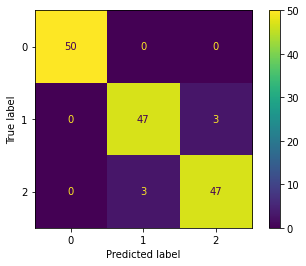

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(iris.target, y_pred_all)

#혼돈 메트릭을 쓴다...! 왜..........................?
cm_display = ConfusionMatrixDisplay(cm).plot()

### 데이터 전처리의 필요성

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


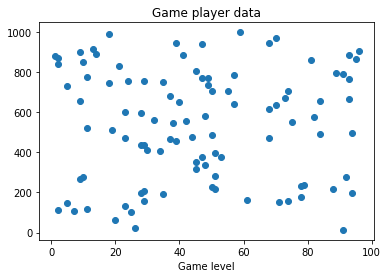

In [28]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level') 
plt.scatter(X, Y)

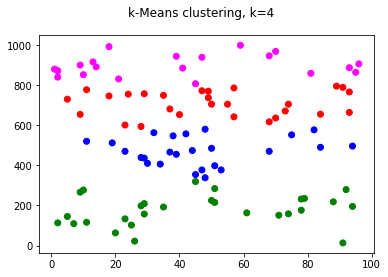

In [29]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
   model = cluster.KMeans(n_clusters=k) #k mean 군집모델(아직안배움)
   model.fit(data)
   labels = model.predict(data)
   colors = np.array(['red', 'green', 'blue', 'magenta'])
   plt.suptitle('k-Means clustering, k={}'.format(k))
   plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

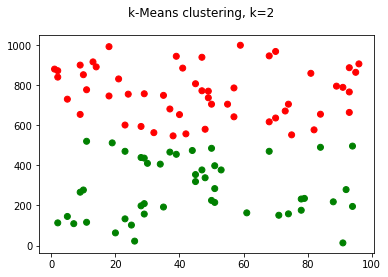

In [30]:
# k = 2일때의 결과
from sklearn import cluster

gamer_data = np.column_stack((X, Y))

def kmeans_predict_plot(X, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    labels = model.predict(X)
    colors = np.array(['red', 'green', 'blue', 'magenta']) 
    plt.suptitle('k-Means clustering, k={}'.format(k)) 
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

kmeans_predict_plot(gamer_data, k = 2)

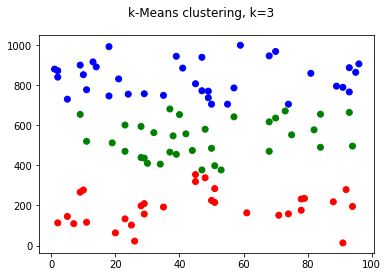

In [31]:
 kmeans_predict_plot(gamer_data, k = 3) # 3개의 군집 생성 

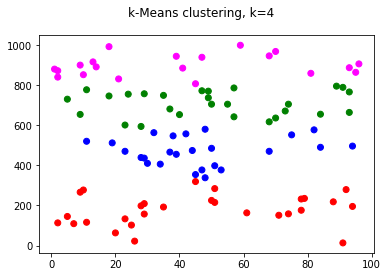

In [32]:
 kmeans_predict_plot(gamer_data, k = 4) # 4개의 군집 생성

(0.0, 1000.0)

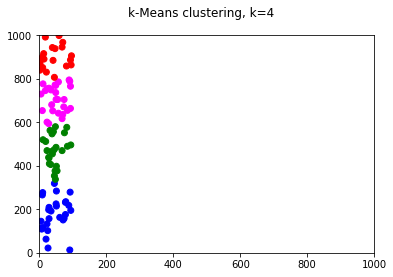

In [33]:
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000); plt.ylim(0, 1000)
# 가로로 나뉘니까 뭔가 그래프가 이상하다는 느낌이 들어야함...!

### 데이터 정규화 방법을 이용하자

In [34]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

# 스케일을 min, max로 맞춰줌
scaler = MinMaxScaler()
#스케일을 왜 fit 할까? -> 주어진 값에서 가장 큰값이 1, 가장 작은값이 0, 각 feature별로 민,맥스를 정해준다...!
scaler.fit(gamer_data)
#원래 데이터를 민맥스의 스케일 값으로 전환해주는 코드가 바로 transform!
n_data = scaler.transform(gamer_data)
n_data[:, 0].mean(), n_data[:, 1].mean()

# 추가로 transform말고 리버스를 하면 다시 원래값으로 되돌려줌...

(0.4731578947368421, 0.5324949290060852)

In [35]:
n_data[:, 0].min(), n_data[:, 0].max()

(0.0, 1.0)

In [36]:
n_data[:, 1].min(), n_data[:, 1].max()

(0.0, 1.0)

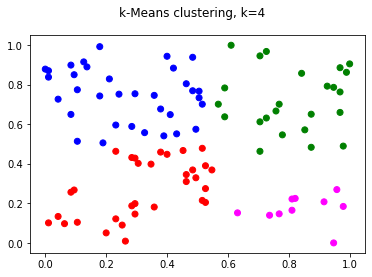

In [37]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성

In [38]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [39]:
from sklearn.preprocessing import StandardScaler

a = a.reshape(-1, 1) # 열벡터로 바꾸는 코드

standardScaler = StandardScaler()
standardScaler.fit(a)
a_scaled = standardScaler.transform(a)

print(a)
print(a_scaled)

[[10]
 [ 8]
 [10]
 [ 8]
 [ 8]
 [ 4]]
[[ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [-2.]]


In [40]:
print('합계 :', a_scaled.sum())
print('평균 :', a_scaled.mean())
print('분산 :', a_scaled.var())
print('표준편차 :', a_scaled.std())

합계 : 0.0
평균 : 0.0
분산 : 1.0
표준편차 : 1.0


In [41]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

(1.0000000000000002, 1.0)

In [42]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()
#밑에 결과값은 (0,0)임

(-1.1435297153639113e-16, 1.1546319456101628e-16)

# 과제06
다음 도미와 빙어의 데이터를 이용하여 새로운 데이터인 길이 25, 무게 150인 물고기를 분류하시오.

참고: https://rebro.kr/183
* 혼공딥 노트북: https://nbviewer.org/github/rickiepark/hg-mldl/blob/master/2-2.ipynb
* 혼공딥 유투브: https://www.youtube.com/watch?v=kaCJ-knm8KU&list=PLJN246lAkhQjoU0C4v8FgtbjOIXxSs_4Q&index=6


In [43]:
#도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0] 
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

problem_fish = [[25.0, 150.0]]

#도미는 선형성이 있고, 빙어는 선형성이 눈에 띠게 보이지 않음

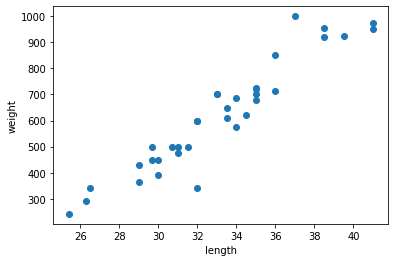

In [44]:
# from K_NN_data import * 
import matplotlib.pyplot as plt 

#도미 키와 몸무게 연관성 그래프
plt.scatter(bream_length, bream_weight) 
plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()

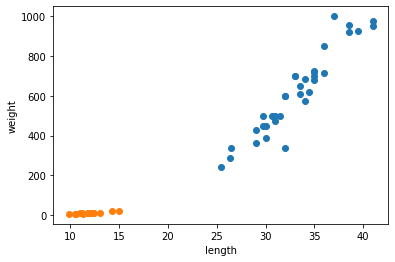

In [45]:
import matplotlib.pyplot as plt 

#빙어 키와 몸무게 연관성 그래프
plt.scatter(bream_length, bream_weight) 
plt.scatter(smelt_length, smelt_weight) 
plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()

In [46]:
#도미데이터와 빙어 데이터를 하나의 값으로 합침

length = bream_length + smelt_length 
weight = bream_weight + smelt_weight

사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다. 

이 패키지를 사용하려면 다음처럼 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 만들어야한다. 

In [47]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)
#zip 함수는 나열된 리스트 각각에서 원소를 하나씩 꺼내 반환한다. 이 함수와 리스트 내포 구문을 이용하면 2차원 리스트를 만들 수 있다.

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [48]:
# 도미를 1로, 빙어를 0으로..
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [49]:
from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier()

# 도미 찾기 기준학습 (fit 메소드 이용해서 훈련시키기.)
kn.fit(fish_data, fish_target) 
# 훈련이 잘 되었는지 평가하기 위해서는 score() 메서드를 사용
print(kn.score(fish_data, fish_target))


1.0


In [50]:
# n_neighbors 매개 변수로 k의 값을 변경할 수 있음, 여기서 k의 값을 물고기의 숫자인 49마리로 바꾼다... 그럼 0.7로 낮아짐
kn = KNeighborsClassifier(n_neighbors=49) 
kn.fit(fish_data, fish_target) 
print(kn.score(fish_data, fish_target))
# k가 49인 경우 어떤 데이터를 넣어도 항상 도미로 예측하기 때문에 정확도를 계산하면... 35/49%이다.  => 적절한 k값을 찾는게 중요

0.7142857142857143


K-NN 알고리즘 실습(훈련 셋과 데이터 셋 분리)

(49, 2)
(35, 2)
(35,)
(14, 2)
(14,)
1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


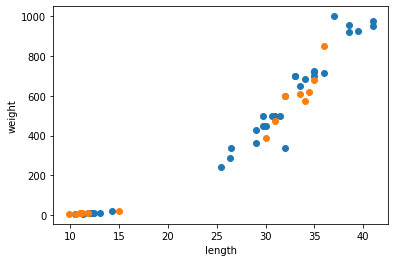

In [51]:
#알고리즘의 성능을 제대로 평가하기 위해서는 훈련 데이터(Train set)와 평가에 사용될 데이터(Test set)가 달라야 한다.
import numpy as np 

#파이썬 리스트를 넘파이 배열로 바꾸는 과정이다. 넘파이 배열을 출력해보면 행과 열이 가지런히 출력된다.
input_arr = np.array(fish_data) 
print(input_arr.shape)
target_arr = np.array(fish_target)

# 0 ~ 48의 인덱스 중 임의로 35개의 인덱스를 선택한 다음, 해당 인덱스에 해당하는 원소를 뽑아내는 방식
np.random.seed(42) #(약간 randomstate=42 같은 느낌..)넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만든다. 일정한 결과를 얻기 위해서는 위처럼 랜덤 시드(Random seed)를 설정해주면 된다. 
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
print(train_input.shape)
train_target = target_arr[index[:35]]
print(train_target.shape)
test_input = input_arr[index[35:49]]
print(test_input.shape)
test_target = target_arr[index[35:49]]
print(test_target.shape)

kn = KNeighborsClassifier()
#학습시키기...
kn.fit(train_input, train_target) 
#평가지표로 계산
print(kn.score(test_input, test_target)) # 1.0 
# predict 메서드는 새로운 데이터의 정답을 예측한다. 리스트의 리스트를 인자로 넘겨줘야 한다.
print(kn.predict(test_input)) # [0 0 1 0 1 1 1 0 1 1 0 1 1 0] 
print(test_target) # [0 0 1 0 1 1 1 0 1 1 0 1 1 0]

#나머지 데이터들로 테스트 셋을 만들고 산점도 그려보면 아래와 같이 잘 섞여 있다.
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()

In [52]:
# 훈련된 모델에 길이가 25cm이고 무게가 150g인 생선 테스트
print(kn.predict([[25.0, 150.0]])) # [0]
#도미인데... 왜 빙어로 나오닝

[0]


kneighbors() 메서드를 사용하면 주어진 샘플에서 가장 가까운 이웃을 찾아준다. 이웃까지의 거리와 이웃 샘플의 인덱스를 반환하고, KNeighborsClassifier 클래스의 n_neighbors의 기본값이 5이므로 5개의 이웃이 반환된다. 

In [53]:
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)


[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]
[[25  2  1 18  3]]


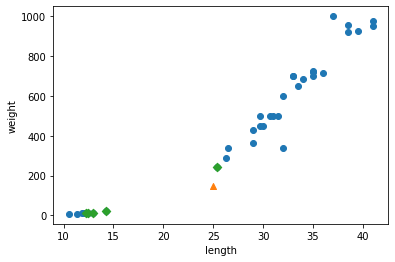

In [54]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
#해당 값으로부터 가까운 데이터를 index라고 보았을때 index[0]이 length이고 index[1]이 weight이다. 두개의 값이 x,y 값으로 표시됨.
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


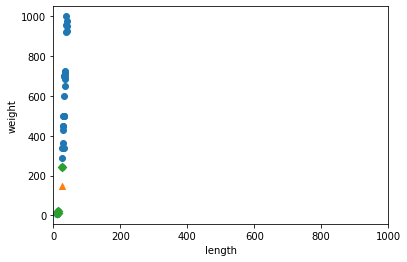

In [55]:
print(distances)

# x축 범위를 y축과 동일하게 표현해보자. x축의 범위 또는 y축의 범위를 조절하려면 xlim, ylim 함수를 사용
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#이 표를 보면 실제로 x는 거리에 영향을 거의 미치지 않는 것을 볼 수 있다.


# x와 y축의 스케일은 매우 다르다... => 데이터 전처리로 처리해줘야한다!!

최소-최대 정규화는 변수 X의 범위를 0%에서 100%까지로 나타내는 방식이다.
 
Xnew=X−min(X)/max(X)−min(X)

 
z-점수 표준화는 변수 X의 범위를 평균으로부터 몇 표준편차만큼 떨어져 있는지를 관점으로 변수를 확대/축소시키는 방식이다. 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸 것이 분산이고, 표준편차는 분산의 제곱근이다. 

Xnew=X−mean(X)/StdDev(X)


In [56]:
#axis = 0은 행을 따라 각 열의 통계 값을, axis = 1은 열을 따라 각 행의 통계 값을 계산한다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std) # [ 28.29428571 483.35714286] [  9.54606704 323.47456715]

train_scaled = (train_input - mean) / std

[ 28.29428571 483.35714286] [  9.54606704 323.47456715]


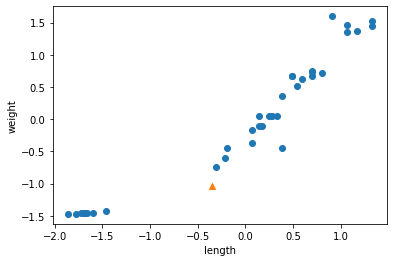

In [57]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


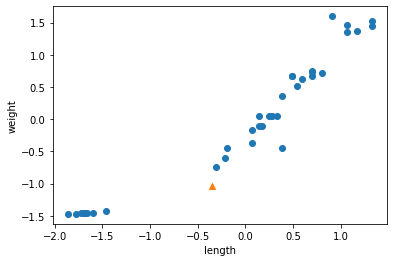

In [66]:
#이건 직접 계산 안하고 스케일러로 호출해서 평균화 시켜주는 과정이다.(그냥 혼자 한번 해봄...)

#스케일러 지정해주는 부분(호출!!)
scaler = StandardScaler()

#스케일러로 변환을 시켜주고~
# test_scaled= scaler.fit_transform(test_input)
train_scaled= scaler.fit_transform(train_input)


kn.fit(train_scaled, train_target)


plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 위에 부분에서 교수님 코멘트..
여기서 강조하고 싶은건, 데이터를 정규화(scaler)할 때, 학습데이터(train_)를 기준으로 바꾸어주어야 해요.
데이터 정규화는 일종의 좌표변환, 공간변환인데, 모델의 학습은 학습데이터로 변형한 공간을 중심으로 학습이 되었어요.
따라서 새로운 데이터(test set)도 이 공간에 맞춰서 변환해주어야 하겠지요. 테스트셋의 평균/분산을 쓰지 않고, 학습데이터의 평균/분산을 이용하여 변환한다는 뜻입니다.
사소할 수 있지만, 디테일을 잘 챙겨보기 바랍니다.

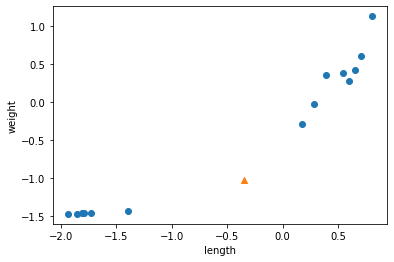

In [68]:
#교수님 코멘트 이후 수정한 부분
# test_scaled = (test_input - mean) / std

scaler = StandardScaler()

# test_scaled= scaler.fit_transform(test_input)
scaler.fit(train_input)
test_scaled = scaler.transform(test_input) #이게 바뀐 코드!
plt.scatter(test_scaled[:, 0], test_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [60]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target) # 1.0
print(kn.predict([new]))


[1]


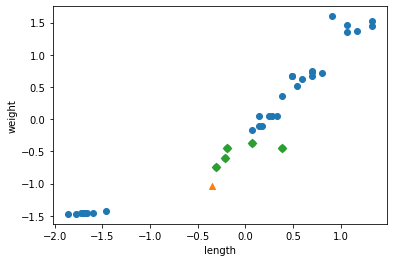

In [61]:
#값을 평준화 했으니까 distances랑 indexes도 new로 바꿔줘야한다.
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


위에 표를 보면 도미의 값으로 알맞게 나온것을 알 수 있다.